In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nexusformat.nexus as nx
from scipy.interpolate import griddata
from lib.reader import *
from lib.helz import *
from lib.imports import *
from lib.filters import *
from lib.visualize import *
plt.style.use('M:\\Betrieb_ISF\\Gruppe_A_Orga\\Arbeitsgebiete\\Python_Auswerteskripte\\example_file.mplstyle')


In [2]:
path='C:\\Users\\maede\\DESY\\data\\laht\\d5kW_oZW_LAHT-044.nxs'
f= nx.nxload(path)
print (f.tree)
files=gather_files_regex('C:\\Users\\maede\\DESY\\data\\laht',r'\S*nxs\Z')

root:NXroot
  entry:NXgroup
    instrument:NXgroup
      xspress3:NXgroup
        channel00:NXgroup
          histogram = int32(500x4096)
          scaler:NXgroup
            allevent = float32(500)
            allgood = float32(500)
            inwindow0 = float32(500)
            inwindow1 = float32(500)
            pileup = float32(500)
            resetcounts = float32(500)
            resetticks = float32(500)
            time = float32(500)
            totalticks = float32(500)
        channel01:NXgroup
          histogram = int32(500x4096)
          scaler:NXgroup
            allevent = float32(500)
            allgood = float32(500)
            inwindow0 = float32(500)
            inwindow1 = float32(500)
            pileup = float32(500)
            resetcounts = float32(500)
            resetticks = float32(500)
            time = float32(500)
            totalticks = float32(500)


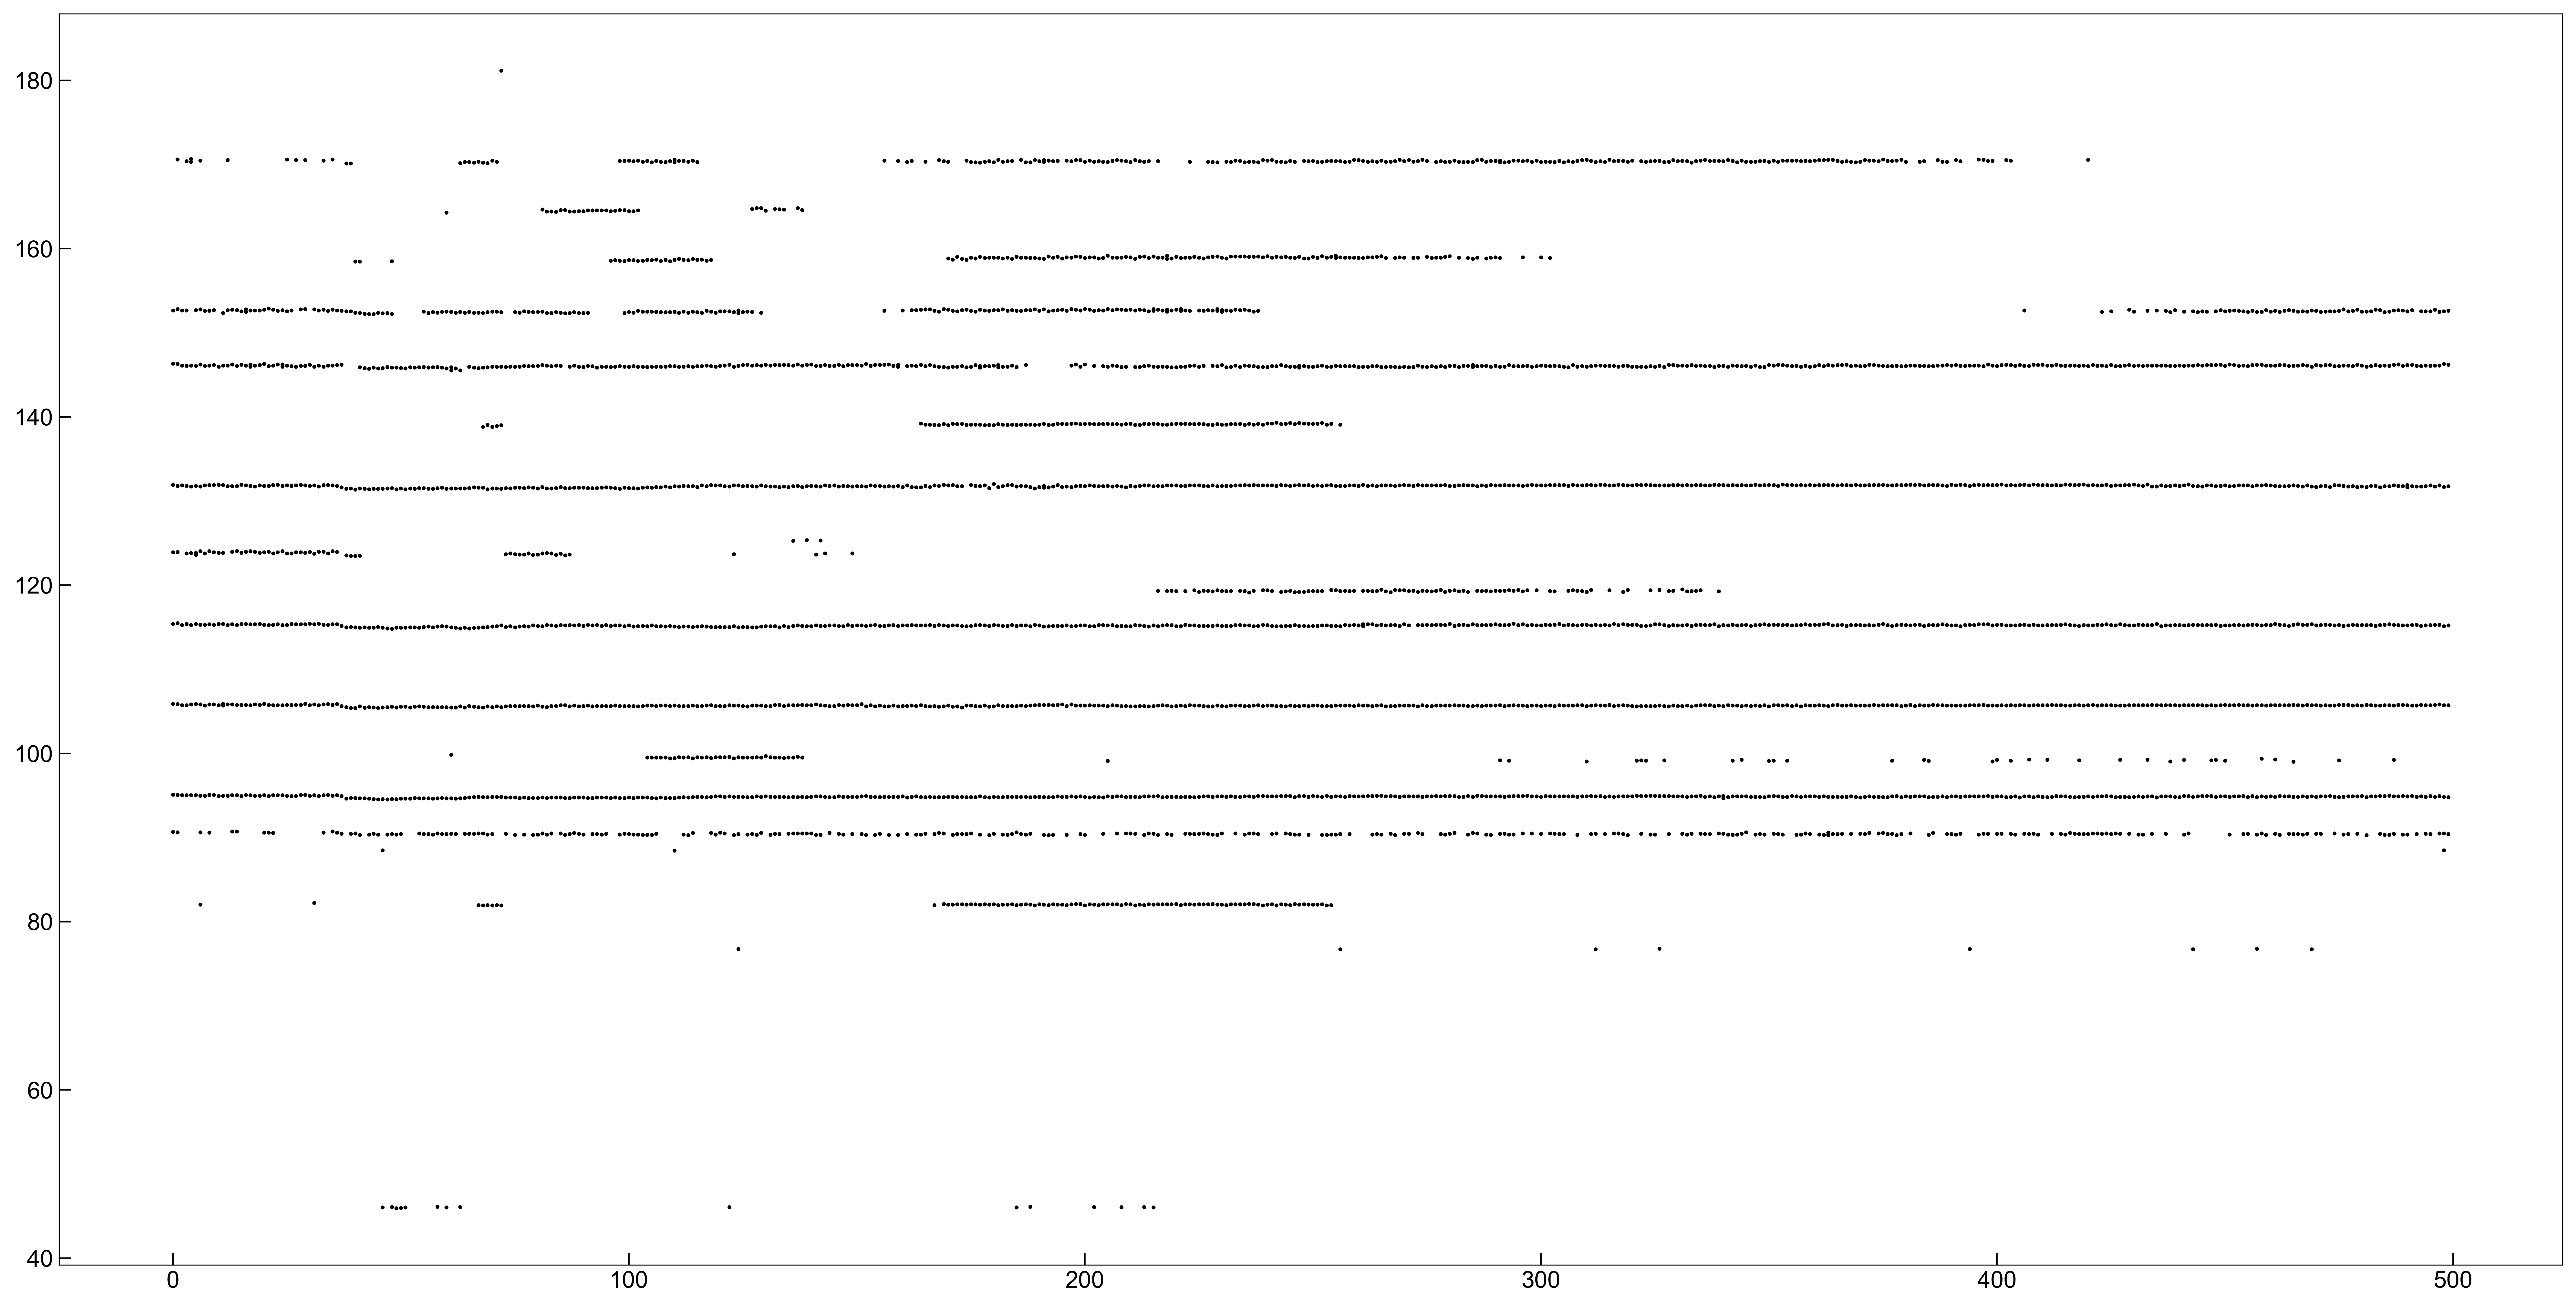

In [3]:

df0,df1=load_nxs(files[2])
dfr0=get_energy_peaks(df0)
dfr0=separate_energy_peak(dfr0,110,120)
disp_peak_move(dfr0)

In [4]:
exs=pd.read_excel('experiments.xlsx',sheet_name='Tabelle3',header=0)
exs['data']=exs.Messdatei.apply(load_nxs)

In [5]:
exs['ch0']=exs['data'].apply(lambda x :x[0] )
exs['ch1']=exs['data'].apply(lambda x :x[1] )

exs['ch0_energypeaks']=exs['ch0'].apply(get_energy_peaks)
exs['ch1_energypeaks']=exs['ch1'].apply(get_energy_peaks)

exs['ch0_energypeaks']=exs['ch0_energypeaks'].apply(lambda x : separate_energy_peak(x,103,110))
exs['ch1_energypeaks']=exs['ch1_energypeaks'].apply(lambda x : separate_energy_peak(x,103,110))

exs['ch0_ss']= exs['ch0_energypeaks'].apply(extract_ss_mean)
exs['ch1_ss']= exs['ch1_energypeaks'].apply(extract_ss_mean)



In [6]:
groups={'HA':1,
        'HA3Si1':2,
        'LAHT':3,
        'HAG199':4,
        'LAHTG199':5,
        'LAG199':6,
        'LA3Si1':7,
        'HAref':11,
        'HAucref':12,
        'LAHTref':31,
        'LAHTucref':32,
        'LAref':61,
        }
groups

{'HA': 1,
 'HA3Si1': 2,
 'LAHT': 3,
 'HAG199': 4,
 'LAHTG199': 5,
 'LAG199': 6,
 'LA3Si1': 7,
 'HAref': 11,
 'HAucref': 12,
 'LAHTref': 31,
 'LAHTucref': 32,
 'LAref': 61}

[]


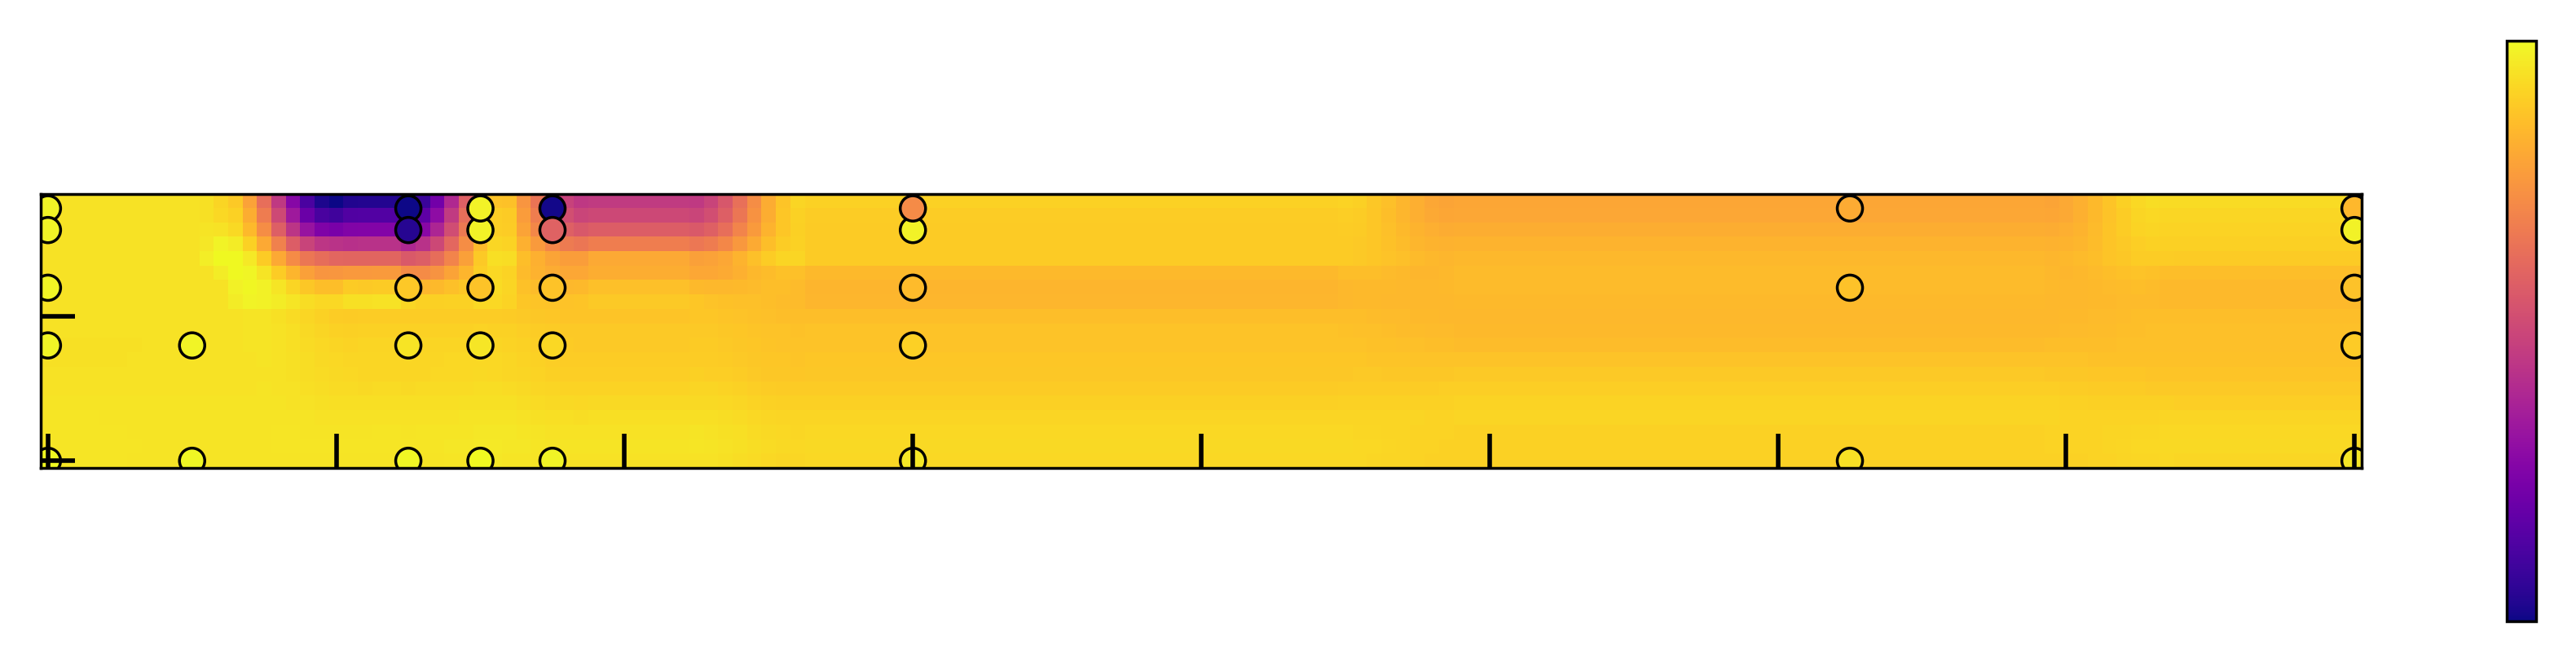

In [7]:
cm=2.5
dfs=exs[exs.Gruppe==groups['LAHT']]
x=-dfs.X
y=-dfs.Z
z=dfs['ch1_ss']
z=z.fillna(exs[exs.Gruppe==groups['LAHTref']]['ch0_ss'].mean())
#z=z.fillna(105.90972527472528)
105.90972527472528
xedges = np.arange(*minmax(x))
yedges = np.arange(*minmax(y))

xcenters = xedges[:-1] + np.diff(xedges[:2])[0] / 2.
ycenters = yedges[:-1] + np.diff(yedges[:2])[0] / 2.

XI, YI = np.meshgrid(xcenters, ycenters)
grid_z0 = griddata(list(zip(x,y)), z, (XI, YI), method='nearest')

fig,ax=plt.subplots(figsize=(20/cm,4/cm))
a=ax.imshow(sgolay2d(grid_z0,9,3),  origin='lower',cmap='plasma')
#a=ax.imshow(grid_z0,  origin='lower',cmap='plasma')

ax.scatter(x+10, y+20, 20,z,  edgecolor='k',lw=0.5,  cmap='plasma')
ax.set_xticklabels([])
ax.set_yticklabels([])
cbar=fig.colorbar(a)
cbar.ax.tick_params(size=0)
cbar.set_ticks([])
#cbar.set_ticks([a.colorbar.vmin + t*(a.colorbar.vmax-a.colorbar.vmin) for t in cbar.ax.get_yticks()])
print(cbar.ax.get_yticks())
#plt.axis('equal')
plt.show()
fig.savefig('result')

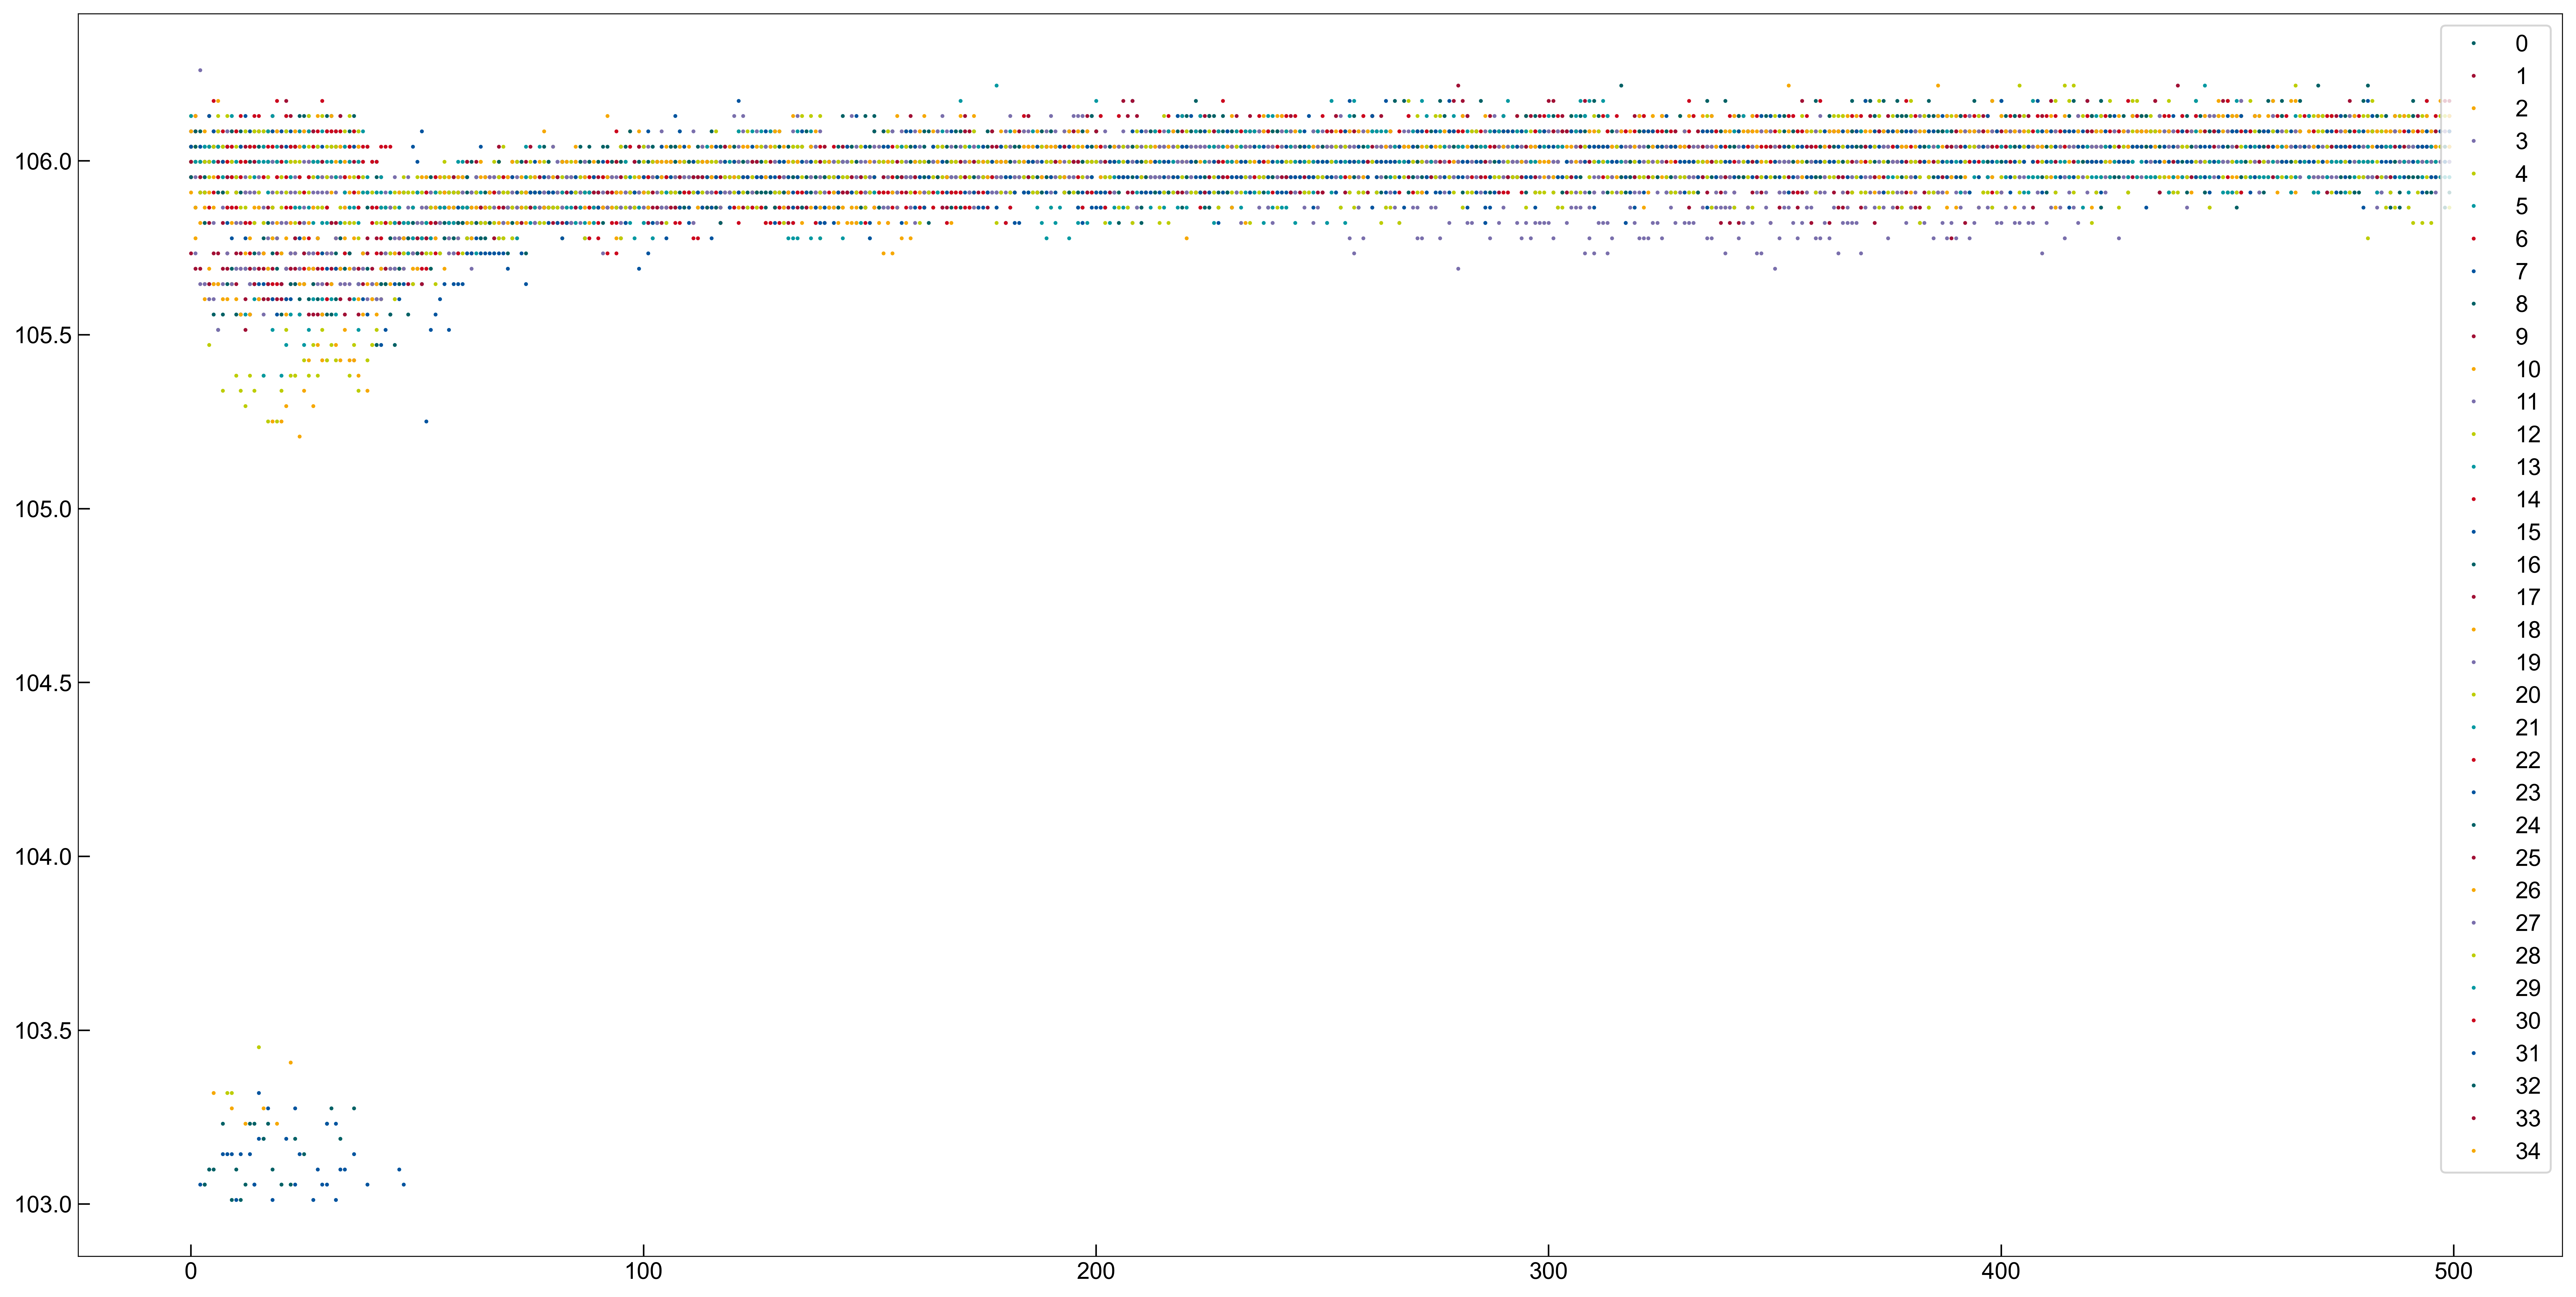

In [8]:
fig,ax=plt.subplots(figsize=(20,10))
for i,val in enumerate(dfs['ch1_energypeaks']):
    ax.plot(val.iloc[:,1],'o',markersize=1,label=i)
plt.legend()
plt.show()

In [9]:
display(dfs)

,Versuchs- Bezeichnung,Gruppe,Schlagzahl-nummer,Zusatzdraht,Grundwerkstoff,"Abstand Schweißen zu Synchrotron (x,y,z) [mm]",X,Y,Z,Thermoelemente,Datum,Messdatei,Kommentare,data,ch0,ch1,ch0_energypeaks,ch1_energypeaks,ch0_ss,ch1_ss
35,LAHT_040,3,259,nein,S235-HT,(-150;0;12),-150,0,12.0,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,105.734121,105.751681
36,LAHT_041,3,260,nein,S235-HT,(-50;0;12),-50,0,12.0,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,105.751681,105.780949
37,LAHT_042,3,258,nein,S235-HT,(-25;0;12),-25,0,12.0,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,105.786802,105.839484
38,LAHT_043,3,257,nein,S235-HT,(-15;0;12),-15,0,12.0,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,T1 abgegangen,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,105.821923,105.921432
39,LAHT_044,3,251,nein,S235-HT,(0;0;12),0,0,12.0,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,105.880458,106.029722
40,LAHT_045,3,253,nein,S235-HT,(10;0;12),10,0,12.0,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,105.868751,106.023868
41,LAHT_046,3,254,nein,S235-HT,"(10;0;2,5)",10,0,2.5,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,105.938993,106.023868
42,LAHT_047,3,252,nein,S235-HT,"(-15;0;2,5)",-15,0,2.5,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,104.882440,103.111030
43,LAHT_048,3,255,nein,S235-HT,"(-25;0;2,5)",-25,0,2.5,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,NaN,103.137684
44,LAHT_049,3,256,nein,S235-HT,"(-150;0;2,5)",-150,0,2.5,"(4,8)",44543,G:\2021-12-07_Desy_Messdaten\complete\raw\LAHT...,NaN,"([31.585164835164836, 31.629065934065935, 31.6...",31.585165 31.629066 31.672967 31.71...,31.585165 31.629066 31.672967 31.71...,peak_energ...,peak_energ...,105.221941,105.611198
